In [1]:
%pylab inline
import tensorflow as tf

Populating the interactive namespace from numpy and matplotlib


## Data input and formating

In [2]:
S = """100	100	16	100	100	100	100	100	100	100	100	9	100	13	14	12	100	100	100	100	1	2	3	15	100	10	100	8	7	100	11	6	5	4	100	100	100	17	
7	100	100	100	100	100	100	100	100	100	100	100	100	100	10	4	100	100	5	100	8	3	100	100	100	9	100	1	6	100	100	100	100	2	100	100	100	100	
100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	8	100	9	100	100	100	3	2	4	1	5	7	6	100	100	100	100	
1	100	100	100	2	100	100	100	100	3	100	4	100	100	100	100	100	100	100	100	100	5	100	100	100	100	100	100	100	100	100	100	6	100	100	100	100	100	
3	4	24	25	8	7	26	27	28	29	30	31	32	33	34	35	12	13	14	15	36	37	38	10	11	16	17	5	6	9	18	19	20	21	1	2	22	23	
100	100	100	100	100	100	100	8	100	100	9	100	100	100	7	1	100	100	100	100	100	10	100	100	100	2	3	100	5	4	6	100	100	100	100	100	100	100	
100	100	100	100	100	100	100	100	2	1	9	8	100	100	100	7	6	100	5	10	100	100	3	100	100	100	4	100	100	100	100	100	100	100	100	100	100	100	
38	37	36	35	34	1	2	3	4	5	6	7	8	9	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	26	27	28	29	30	31	32	33	
38	37	36	35	34	33	32	1	2	3	4	5	31	6	7	30	29	28	8	9	10	11	12	13	14	15	16	17	18	19	20	21	27	22	23	24	25	26	
100	100	100	100	100	100	100	100	8	7	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	4	1	2	6	100	5	3	100	100	
100	100	100	100	100	100	4	100	100	100	100	100	100	5	100	100	100	100	100	100	100	100	100	100	1	2	3	100	100	100	100	100	100	100	100	100	100	100	
3	4	1	2	5	7	6	8	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	
100	100	100	100	100	100	100	100	100	100	100	100	8	100	100	2	100	100	4	3	100	100	6	100	5	7	1	100	100	10	12	100	100	11	13	100	100	9	
100	100	100	100	11	100	100	100	100	100	100	100	100	6	5	2	100	100	100	10	4	3	100	100	9	100	1	100	100	7	100	100	100	100	100	8	100	100	
24	32	33	34	35	21	7	23	6	9	22	4	12	18	19	1	20	28	2	15	38	37	16	36	10	17	3	11	13	25	14	8	26	5	30	31	27	29	
37	36	35	34	32	28	29	30	27	31	26	1	21	22	10	13	20	23	24	25	2	12	11	3	15	4	100	16	5	18	17	6	14	19	7	8	9	33	
100	100	100	100	4	1	2	3	5	8	6	7	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	
100	100	10	5	100	8	100	2	100	7	3	100	100	9	4	1	100	100	100	100	100	100	100	100	100	100	6	100	100	100	100	100	100	100	100	100	100	100	
100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	4	100	2	3	100	1	100	100	100	100	100	100	100	9	6	5	8	7	100	100	100	100	
100	100	100	100	100	100	100	2	3	100	100	100	100	100	4	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	1	5	100	100	100	100	100	"""
N_STUDENTS = int(S.count('\n')+1)
N_PAPERS = int(S.count('\t')/N_STUDENTS)
print( N_PAPERS, N_STUDENTS)
M = np.fromstring(S.replace('\n',''),sep='\t').reshape((N_STUDENTS,N_PAPERS))
M -= 1
M[M>=7] = 100
S = """0 true
1 false
2 false
3 true
4 false
5 true
6 false
7 true
8 false
9 false
10 true
11 false
12 false
13 true
14 true
15 true
16 false
17 false
18 false
19 false"""
V = ['true' in l for l in S.split('\n')]

38 20


There are only a few papers that are not that popular:

In [3]:
print( np.min(M,axis=0) )

[   0.    3.    0.    1.    1.    0.    1.    0.    1.    0.    2.    0.
  100.    4.    3.    0.    3.  100.    1.    2.    0.    0.    2.    2.
    0.    1.    0.    0.    1.    3.    0.    0.    4.    1.    0.    1.
  100.  100.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]


Now we need to make sure that some students get a chance to present a second paper. If there is still not enough volunteers we pad the votes with zeros.

In [4]:
SECOND_WEIGHT = 0.33
# Duplicating the voluneers
names = [str(i) for i in range(N_STUDENTS)]
MM = list(M)
for n,v in enumerate(V):
    if v:
        names.append(str(n))
        MM.append(SECOND_WEIGHT * MM[n])

print( N_PAPERS - len(MM), 'Papers remain (padding)')
# Pad
for i in range(N_PAPERS - len(MM)):
    names.append('-')
    MM.append(0*MM[0])
M = np.array(MM)

10 Papers remain (padding)


In [5]:
# Break ties
M = M + np.random.normal(scale=0.1, size=M.shape)

(38, 38)


In [6]:
# N_PAPERS = 25
# N_STUDENTS = N_PAPERS
N_VOTES = 7
DEPTH = 2
N_STUDENTS,N_PAPERS = M.shape
SHARE_VARIABLES = None
print( N_STUDENTS, N_PAPERS)

def randomVote():
    return [np.random.choice(N_PAPERS,size=N_VOTES,replace=False) for i in range(N_STUDENTS)]
    

def pref2score(p, default=2*N_VOTES):
    r = np.ones(N_PAPERS)*default
    for i,j in enumerate(p):
        assert r[j] >= default-1, "Duplicate vote!"
        r[j] = i
    return r

38 38


## Deep net setup

In [7]:
rank_cost = tf.placeholder(tf.float32, shape=(N_STUDENTS,N_PAPERS))
# Break ties
# rank_cost = rank_cost + tf.random_normal(rank_cost.get_shape(), stddev=0.1)
rank_mask = tf.cast(tf.less_equal(rank_cost, tf.constant(N_VOTES, dtype=np.float32)), tf.float32)

def bi_stochastic_vote(score, mask, nit=10):
    F = tf.reshape(score, (-1,N_STUDENTS,N_PAPERS))
    P = tf.exp(F - tf.reduce_max(F,1)) * tf.reshape(mask, (-1,N_STUDENTS,N_PAPERS))
    P = (P+1e-5) / (tf.reduce_sum(P, 2, keep_dims=True)+1e-5)
    for i in range(nit):
        P = (P+1e-5) / (tf.reduce_sum(P, 1, keep_dims=True)+1e-5)
        P = (P+1e-5) / (tf.reduce_sum(P, 2, keep_dims=True)+1e-5)
    return P

F = -rank_cost
S = bi_stochastic_vote(F, rank_mask)
features = [ F ]
scores = [ S ]
losses = [ tf.reduce_sum(S*tf.reshape(rank_cost, (-1,N_STUDENTS,N_PAPERS))) ]
for it in range(DEPTH):
    F = tf.reshape(F, (-1,N_PAPERS*N_STUDENTS))
    R  = tf.reshape(rank_cost, (-1,N_PAPERS*N_STUDENTS))
    F = tf.concat(1, [F,R])
    
    for j,n in enumerate([512,512,N_PAPERS*N_STUDENTS]):
        if j>0: F = tf.nn.relu(F)
        if SHARE_VARIABLES is not None:
            if 'fc_%d'%(j) not in SHARE_VARIABLES:
                SHARE_VARIABLES['fc_%d'%(j)] = tf.Variable(tf.random_normal((F.get_shape().as_list()[1], n), stddev=0.01), name='fc_%d'%(j))
            if 'b_%d'%(j) not in SHARE_VARIABLES:
                SHARE_VARIABLES['b_%d'%(j)] = tf.Variable(tf.random_normal((n,), stddev=0.01), name='b_%d'%(j))
            K, B = SHARE_VARIABLES['fc_%d'%(j)], SHARE_VARIABLES['b_%d'%(j)]
        else:
            K = tf.Variable(tf.random_normal((F.get_shape().as_list()[1], n), stddev=0.01), name='fc_%d_%d'%(it,j))
            B = tf.Variable(tf.random_normal((n,), stddev=0.01), name='b_%d_%d'%(it,j))
        F = tf.nn.bias_add(tf.matmul(F,K), B)
#         F = tf.matmul(F,K)
    features.append(F)
    S = bi_stochastic_vote(F, rank_mask)
    L = tf.reduce_sum(S*rank_cost)
    scores.append(S)
    losses.append(L)

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    R = sess.run(losses, {rank_cost: M})
    print( R )

[52.25618, 79.471771, 78.437904]


## Training and finetuning
This mostly solves an LP assignment problem as training with random examples is a bit too hard.

Pre training
0 [44.421322, 115.27051, 115.76402]
100 [40.590221, 112.50207, 107.05253]
200 [50.254799, 115.21918, 115.21756]
300 [50.247643, 118.57336, 117.13686]
400 [48.874458, 112.70963, 109.76686]
500 [39.479111, 114.35849, 113.94958]
600 [43.827778, 112.47904, 113.4774]
700 [51.473442, 119.15604, 120.63311]
800 [43.381367, 118.53546, 119.7487]
900 [61.745975, 127.05356, 127.5811]
Fine tuning
0 [52.256184, 149.22874, 88.015633]
100 [52.256184, 29.145086, 28.714191]
200 [52.25618, 29.136444, 28.710325]
300 [52.256184, 29.11054, 28.708208]
400 [52.25618, 29.012962, 28.708149]
500 [52.256184, 29.012451, 28.708115]
600 [52.25618, 29.007162, 28.708094]
700 [52.256184, 29.004482, 28.70808]
800 [52.25618, 29.004345, 28.708069]
900 [52.25618, 29.004253, 28.708059]
[52.256184, 29.004038, 28.708052]


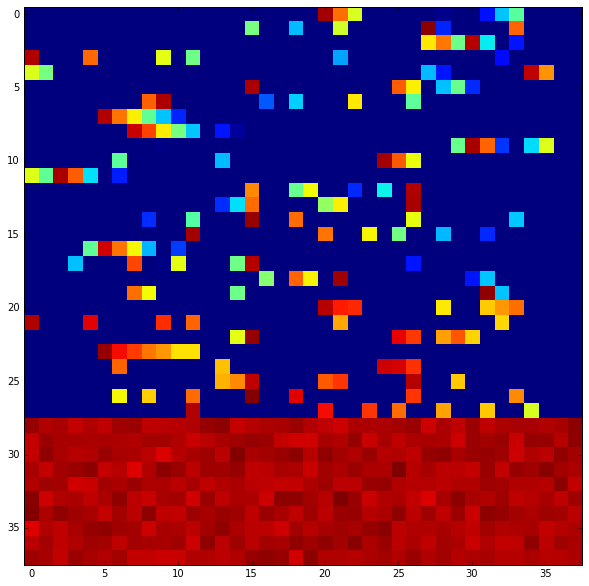

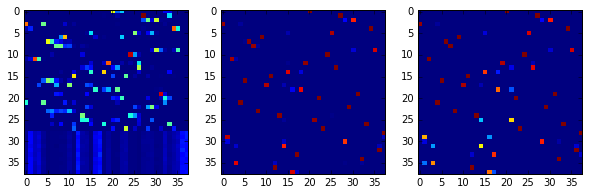

In [8]:
adam = tf.train.AdamOptimizer(1e-4)
step = adam.minimize(tf.add_n(losses))

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    # Train on random examples
    print("Pre training")
    for it in range(1000):
        random_score = np.array([pref2score(p) for p in randomVote()])
        
        vals = sess.run(losses+[step], {rank_cost: random_score})
        if it % 100 == 0:
            print( it, vals[:len(losses)] )
    
    # Fine tune on single example
    print("Fine tuning")
    for it in range(1000):
        vals = sess.run(losses+[step], {rank_cost: M})
        if it % 100 == 0:
            print( it, vals[:len(losses)] )
            
            
    loss_vals = sess.run(losses, {rank_cost: M})
    score_vals = sess.run(scores, {rank_cost: M})
    print( loss_vals )
    figure(figsize=(10,20))
    imshow(np.maximum(N_VOTES-M,1), interpolation='nearest')
    figure(figsize=(10,20))
    for i,s in enumerate(score_vals):
        subplot(1,len(scores),i+1)
        imshow(s[0], interpolation='nearest')


## Greedy assignment
Since we want a {0,1} assignment instead of a relaxed assignment we greedily select the most confident votes.

In [10]:
def assign_rand(s):
    s = np.squeeze(s)
    paper2student = {}
    for i in np.random.permutation(N_STUDENTS):
        for j in np.argsort(s[i])[::-1]:
            if j not in paper2student:
                paper2student[j] = i
                break
    student2paper = {}
    for i in np.random.permutation(N_PAPERS):
        student2paper[paper2student[i]] = i
    return student2paper

def best_assign(s):
    best_A = assign_rand(s)
    best_loss = np.sum([M[i,best_A[i]] for i in range(N_STUDENTS)])
    for it in range(100):
        A = assign(s)
        loss = np.sum([M[i,A[i]] for i in range(N_STUDENTS)])
        if loss < best_loss:
            best_loss = loss
            best_A = A
    return best_A

def assign(s):
    s = np.squeeze(s)
    paper_used = set()
    student2paper = {}
    for i in np.argsort(s.ravel())[::-1]:
        s, p = i // N_PAPERS, i % N_PAPERS
        if p in paper_used or s in student2paper:
            continue
        paper_used.add(p)
        student2paper[s] = p
    return student2paper

print('greedy baseline')
A = assign(-M)
print( np.sum([M[i,A[i]] for i in range(N_STUDENTS)]) )
print( A )

print()
print()
print('deep net')
A = assign(s)
print( np.sum([M[i,A[i]] for i in range(N_STUDENTS)]) )
print( A )

greedy baseline
546.064196208
{0: 20, 1: 27, 2: 28, 3: 32, 4: 34, 5: 12, 6: 9, 7: 8, 8: 7, 9: 30, 10: 3, 11: 2, 12: 17, 13: 26, 14: 35, 15: 11, 16: 16, 17: 10, 18: 18, 19: 31, 20: 33, 21: 4, 22: 29, 23: 5, 24: 6, 25: 1, 26: 15, 27: 23, 28: 13, 29: 37, 30: 14, 31: 25, 32: 36, 33: 21, 34: 0, 35: 24, 36: 22, 37: 19}


deep net
14.846584429
{0: 20, 1: 27, 2: 30, 3: 0, 4: 34, 5: 25, 6: 9, 7: 6, 8: 7, 9: 35, 10: 24, 11: 2, 12: 19, 13: 26, 14: 15, 15: 11, 16: 5, 17: 10, 18: 18, 19: 31, 20: 22, 21: 4, 22: 29, 23: 8, 24: 13, 25: 21, 26: 33, 27: 23, 28: 37, 29: 1, 30: 28, 31: 14, 32: 36, 33: 17, 34: 32, 35: 3, 36: 12, 37: 16}


## Visualization and output

(array([ 14.,   0.,   0.,   0.,   0.,   3.,   0.,   0.,   0.,   3.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 10 Patch objects>)

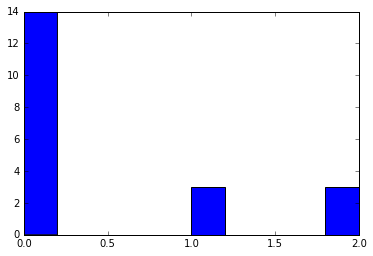

In [12]:
# Number of first picks
hist( [np.round(M[i,A[i]]) for i in range(20)] )

(array([ 1.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  0.,  1.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 10 Patch objects>)

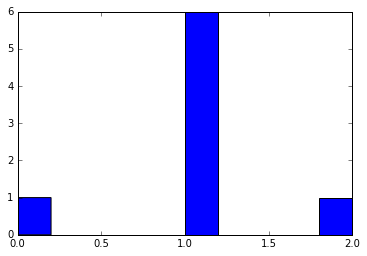

In [15]:
# Number of first picks second presentation
hist( [np.round(M[i,A[i]]) for i in range(20,28)] )


In [16]:
A

{0: 20,
 1: 27,
 2: 30,
 3: 0,
 4: 34,
 5: 25,
 6: 9,
 7: 6,
 8: 7,
 9: 35,
 10: 24,
 11: 2,
 12: 19,
 13: 26,
 14: 15,
 15: 11,
 16: 5,
 17: 10,
 18: 18,
 19: 31,
 20: 22,
 21: 4,
 22: 29,
 23: 8,
 24: 13,
 25: 21,
 26: 33,
 27: 23,
 28: 37,
 29: 1,
 30: 28,
 31: 14,
 32: 36,
 33: 17,
 34: 32,
 35: 3,
 36: 12,
 37: 16}